# Importing the Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

# Showing Directories with List

In [2]:
DATASET_PATH = "/kaggle/input/fashion-product-images-dataset/fashion-dataset/fashion-dataset/"
print(os.listdir(DATASET_PATH))

['images.csv', 'images', 'styles.csv', 'styles']


# What is inside the image directory
## Observing some sample image

['images.csv', 'images', 'styles.csv', 'styles']
31973.jpg
30778.jpg
19812.jpg
22735.jpg
38246.jpg
16916.jpg
52876.jpg
39500.jpg
44758.jpg
59454.jpg


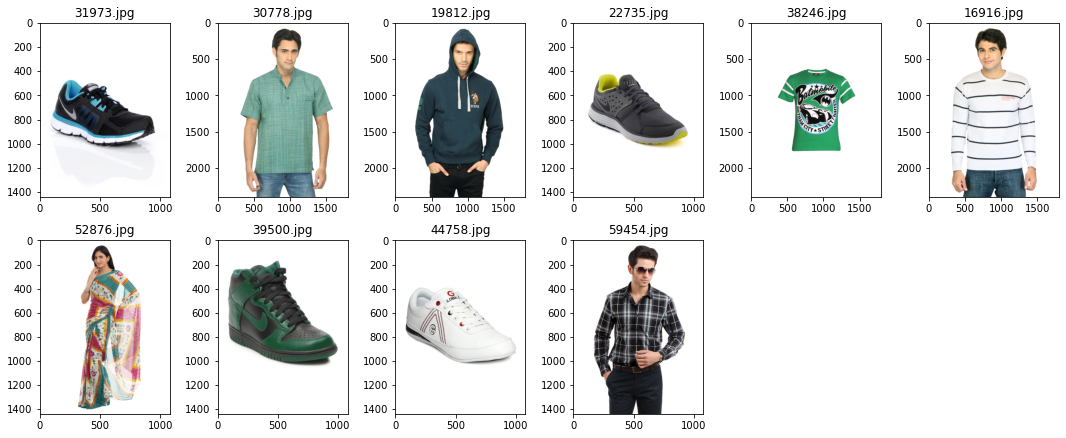

In [3]:
# what is inside the main directory
list_directory = os.listdir(DATASET_PATH)
print(list_directory)

# each time directory files gets reordered. That's why needed to find where images folder is.
index=0
for i in range (len(list_directory)):
    if list_directory[i]=="images":
        index=i
        break

# what is in the image directory
imageIndex = os.listdir(DATASET_PATH+list_directory[index])
# print(type(imageIndex))
head = 10

# collecting some samples in list
sampleImages = []

# showing indices
for i in range (head):
    sampleImages.append(imageIndex[i])
    print(sampleImages[i])

# choosing some samples to observe
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
axis=[]
row = len(sampleImages)/2
col = row+1

for i in range (len(sampleImages)):
    Image_path=DATASET_PATH+list_directory[index]+"/"+sampleImages[i]
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
    axis.append(fig.add_subplot(row, col, i+1))
    subplot_title=sampleImages[i]
    axis[-1].set_title(subplot_title)  
    plt.imshow(image)

fig.tight_layout()
plt.show()

# Problem1-We have no labeled data. Exploring styles.csv for more info. 

In [4]:
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=10000, error_bad_lines=False)
df.head(10)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\n'


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch


# Image id matches with styles.csv file Id column. 
## For ease of access, adding another column naming 'id.jpg'

In [5]:
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016,Casual,Skagen Men Black Watch,30039.jpg


# Building another dataframe with columns- image and article type

In [6]:
augmentedDataframe = pd.DataFrame({
    'filename': df['image'],
    'type': df['articleType']
})

# total number of entries in the dataframe
total_row = len(augmentedDataframe)
print('total row count: ', total_row)

augmentedDataframe.head(10)

total row count:  10000


,filename,type
0,15970.jpg,Shirts
1,39386.jpg,Jeans
2,59263.jpg,Watches
3,21379.jpg,Track Pants
4,53759.jpg,Tshirts
5,1855.jpg,Tshirts
6,30805.jpg,Shirts
7,26960.jpg,Shirts
8,29114.jpg,Socks
9,30039.jpg,Watches


> # Created a list with unique values And added a column with their specified element position

In [7]:
unique_types = augmentedDataframe['type'].unique().tolist()
total_class = len(unique_types)
print(total_class)
print(unique_types)
print(unique_types[0])
print(unique_types.index(unique_types[0]))
augmentedDataframe['number_types'] = augmentedDataframe['type'].apply(lambda x: unique_types.index(x) if x in unique_types else 0)
augmentedDataframe.head(10)

127
['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks', 'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra', 'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant', 'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas', 'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees', 'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests', 'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket', 'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring', 'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers', 'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta', 'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics', 'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser', 'Necklace and Chains', 'Duffel Bag', 'Sports Sandals', 'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag', 'Tracksuits', 'Swimwear', 'Shoe Laces', 'Fragrance Gift Set', 'Bangle', 'Nightdress', 'Ties', 'Baby Dolls', 'Legging

,filename,type,number_types
0,15970.jpg,Shirts,0
1,39386.jpg,Jeans,1
2,59263.jpg,Watches,2
3,21379.jpg,Track Pants,3
4,53759.jpg,Tshirts,4
5,1855.jpg,Tshirts,4
6,30805.jpg,Shirts,0
7,26960.jpg,Shirts,0
8,29114.jpg,Socks,5
9,30039.jpg,Watches,2


In [8]:
augmentedDataframe['type'].value_counts()

Tshirts            1579
Shirts              745
Casual Shoes        631
Watches             549
Sports Shoes        455
                   ... 
Blazers               1
Wristbands            1
Tablet Sleeve         1
Trolley Bag           1
Nail Essentials       1
Name: type, Length: 127, dtype: int64

# Here total counting length is 108. Total number of type classes available 108.

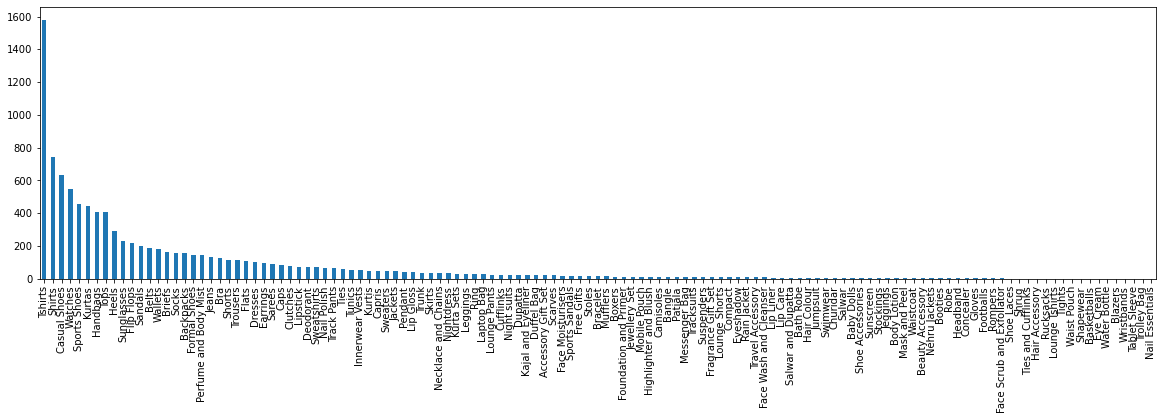

In [9]:
plt.figure(figsize=(20,5))
augmentedDataframe['type'].value_counts().plot(kind='bar',x='type',y='filename')
plt.show()

# Starting with train and test data
## Inserting Image and Labels in numpy array

# Utility Function to get images and inserted into image array
## Start and Stop parameters will be useful train and test separation

## Here all X=image_data, Y=label_data

In [10]:
from tqdm.notebook import tqdm
tqdm.pandas()

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [11]:
def getData(start,stop):
    x_data = []
    y_data = []
    #start = 0 #setting start parameter
    #stop = int(0.001*total_row) #setting stop parameter 
    
    for i in tqdm(range(start, stop)): 
        Image_path=DATASET_PATH+list_directory[index]+"/"+augmentedDataframe.loc[i,'filename']
#         print(augmentedDataframe.loc[i,'filename'])
        image = cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)
        try:
            resized_img = cv2.resize(image, dsize=(28, 28))
        except:
            print("Rejected Image: "+augmentedDataframe.loc[i,'filename'])
            continue
        x_data.append(resized_img) 
        y_values = augmentedDataframe.loc[i,'number_types'] # earlier it was type
        y_data.append(y_values)
                
    return x_data, y_data

# Test of the function

In [12]:
X=[]
Y=[]
# for now start=0,stop=(0.001*total_row)
# total_row=count of rows in augmented data frame
start = 0
stop = int(0.001*total_row) # testing with 0.1% image of the dataset
X,Y=getData(start,stop)

<class 'list'>


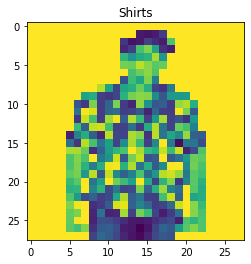

In [13]:
print(type(X))
# print(X[0])
plt.title(unique_types[Y[0]])
plt.imshow(X[0])

# Adding all the images to numpy array
> # X=Image Array
> # Y=Image Label Array

In [14]:
X=[]
Y=[]
start = 0
stop = total_row
X,Y=getData(start,stop)

# conversion into numpy array
X = np.array(X).reshape(-1, 28,28,1)
Y = np.array(Y)

# normalizing
X = X/255

# processing Y_train for dimension matching
Y = Y.reshape(len(X),)

Rejected Image: 39403.jpg



In [15]:
print('Image Data Shape: ',X.shape)
print('Label Data Shape: ',Y.shape)

Image Data Shape:  (9999, 28, 28, 1)
Label Data Shape:  (9999,)


# Now we got Image and Label added in the arrays. Next will be Spliting both train and test data.

> # Train,Test Division into 90:10
> # Train,Validation Division into 90:10
> Train, Validation, Test Percentage 80:10:10

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 500)

In [18]:
print('Train Image Data Shape: ',X_train.shape)
print('Train Label Data Shape: ',Y_train.shape)
print('Test Image Data Shape: ',X_test.shape)
print('Test Label Data Shape: ',Y_test.shape)


Train Image Data Shape:  (8999, 28, 28, 1)
Train Label Data Shape:  (8999,)
Test Image Data Shape:  (1000, 28, 28, 1)
Test Label Data Shape:  (1000,)


In [19]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 500)

In [20]:
print('Train Image Data Shape: ',X_train.shape)
print('Train Label Data Shape: ',Y_train.shape)
print('Validation Image Data Shape: ',X_validate.shape)
print('Validation Label Data Shape: ',Y_validate.shape)

Train Image Data Shape:  (8099, 28, 28, 1)
Train Label Data Shape:  (8099,)
Validation Image Data Shape:  (900, 28, 28, 1)
Validation Label Data Shape:  (900,)


> ## Splitting done with train and test and validation set.

# CNN Model Create

># Importing Libraries

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout, LayerNormalization
from tensorflow.keras.optimizers import Adam
import os
import tensorflow as tf
import datetime, os
from tensorflow.keras.callbacks import TensorBoard

> # Creating sequential model with three layers

In [22]:
def build_model():
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model.add(LayerNormalization())
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(LayerNormalization())
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
    cnn_model.add(LayerNormalization())
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Flatten())
    cnn_model.add(Dense(units = 256, activation = 'relu'))
    cnn_model.add(LayerNormalization())
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Dense(units = total_class, activation = 'softmax'))
    return cnn_model


In [23]:
model=build_model()

In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
layer_normalization (LayerNo (None, 26, 26, 32)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
layer_normalization_1 (Layer (None, 11, 11, 64)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [25]:
def train_model(model):
    opt = Adam(learning_rate=5e-5)
    model.compile( loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
    history = model.fit(X_train, Y_train, batch_size = 256, epochs = 50, verbose = 1, validation_data = (X_validate, Y_validate))
#     model.fit(X_train, Y_train, epochs=50, batch_size=512, validation_split=0.2)

In [26]:
train_model(model)

Epoch 1/50
32/32 [==============================] - 1s 31ms/step - loss: 4.0235 - accuracy: 0.1175 - val_loss: 3.3005 - val_accuracy: 0.2244
Epoch 2/50
32/32 [==============================] - 1s 20ms/step - loss: 3.2853 - accuracy: 0.1961 - val_loss: 2.5906 - val_accuracy: 0.2867
Epoch 3/50
32/32 [==============================] - 1s 20ms/step - loss: 2.7099 - accuracy: 0.2879 - val_loss: 2.0305 - val_accuracy: 0.4644
Epoch 4/50
32/32 [==============================] - 1s 20ms/step - loss: 2.3037 - accuracy: 0.3823 - val_loss: 1.7290 - val_accuracy: 0.5133
Epoch 5/50
32/32 [==============================] - 1s 20ms/step - loss: 2.0216 - accuracy: 0.4546 - val_loss: 1.4784 - val_accuracy: 0.5833
Epoch 6/50
32/32 [==============================] - 1s 20ms/step - loss: 1.7997 - accuracy: 0.5015 - val_loss: 1.3521 - val_accuracy: 0.6211
Epoch 7/50
32/32 [==============================] - 1s 20ms/step - loss: 1.6567 - accuracy: 0.5307 - val_loss: 1.2958 - val_accuracy: 0.6400
Epoch 8/50
32

# Load Model

In [27]:
# from keras import models

In [28]:
# model = models.load_model('visual_product_recommend.h5')

# Saving Model

In [29]:
# model.save('visual_product_recommend.h5')

# Model Evolution

Text(0.5, 1.0, 'Accuracy evolution')

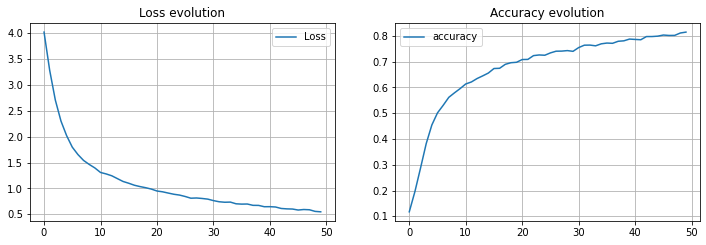

In [30]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(model.history.history['loss'], label='Loss')
# plt.plot(model.history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(model.history.history['accuracy'], label='accuracy')
# plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

# Predictions for the test data

In [31]:
predicted_classes = model.predict_classes(X_test)

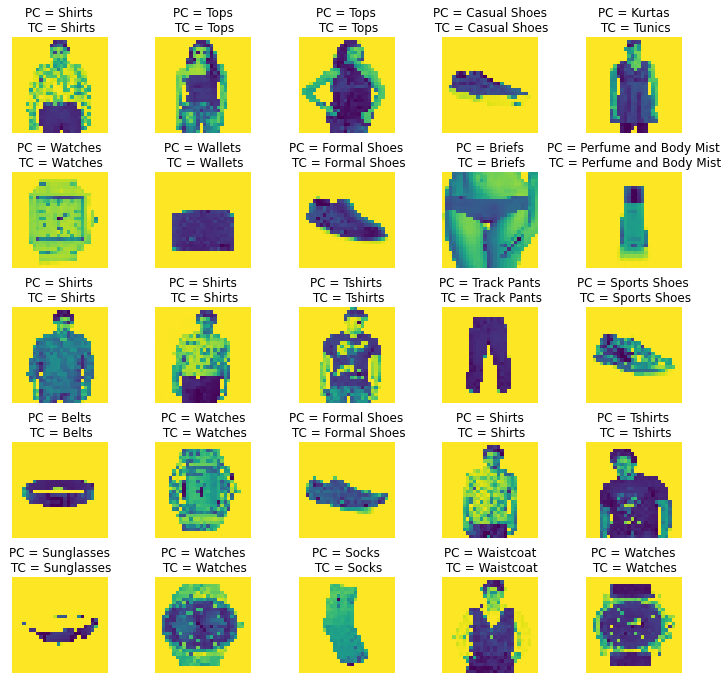

In [32]:
#PC=PredictedClass #TC=TrueClass
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"PC = {unique_types[predicted_classes[i]]}\n TC = {unique_types[Y_test[i]]}") #predicted_classes[i]:0.1f #Y_test[i]:0.1f
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

# Single Image Prediction & Find the Label of the Image

In [33]:
#augmentedDataframe.head(10)

In [34]:
def load_image(i):
    Image_path=DATASET_PATH+list_directory[index]+"/"+augmentedDataframe.loc[i,'filename']
    Image_id=augmentedDataframe.loc[i,'filename'].split(".")
    res=Image_id[0]
    image = cv2.imread(Image_path,cv2.IMREAD_COLOR)
    resized_img = cv2.resize(image, dsize=(224, 224))
    return resized_img,res

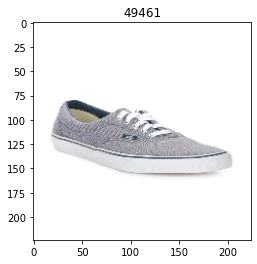

In [35]:
img,img_id = load_image(105)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.title(img_id)
plt.imshow(img)

In [36]:
def make_prediction(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    resized_img = cv2.resize(img, dsize=(28, 28))
    x_data = np.array(resized_img).reshape(-1, 28,28,1)
    x_data=x_data/255
#     print(x_data)
#     print(x_data.shape)
    result=model.predict(x_data)
#     print(type(result))
#     print(np.argmax(result))
    return x_data,unique_types[np.argmax(result)]
    

In [37]:
numpy_image,result=make_prediction(img)
print(result)

Casual Shoes


In [38]:
#df.head(10)

# Starting Check for Similarity

In [39]:
typeList=[]
for i, row in df.iterrows(): 
    if(row["articleType"]==result):
        #print(row["id"],row["articleType"])
        if(img_id!=str(row["id"])):
            typeList.append(row['id'])

In [40]:
print(typeList)

[9204, 39988, 22198, 29570, 26538, 49495, 19311, 23849, 24250, 15517, 4140, 6425, 42270, 32751, 39943, 22705, 50741, 20856, 19772, 5896, 49492, 9031, 59056, 15379, 19329, 39944, 36130, 44510, 22702, 30233, 6422, 12507, 42045, 24257, 15510, 20894, 40971, 7364, 13073, 39972, 16165, 22162, 17043, 10266, 4343, 47501, 22196, 23878, 26536, 54740, 13087, 32552, 39986, 12509, 23840, 24259, 18665, 20893, 9000, 50748, 11976, 3505, 13080, 32555, 39981, 15377, 5898, 22191, 26531, 6413, 11949, 5050, 22165, 49468, 10295, 22733, 13074, 39975, 22501, 37241, 3551, 42020, 4122, 21740, 3797, 44747, 14498, 38652, 23814, 17813, 18403, 12905, 5699, 24669, 47109, 44778, 39310, 31941, 13649, 34857, 33840, 3790, 44740, 7754, 2828, 13685, 26562, 6672, 21747, 20695, 6440, 24463, 3556, 8982, 37246, 2817, 33847, 2219, 49060, 31946, 54519, 18404, 12902, 23679, 17814, 34859, 41452, 3594, 50376, 44776, 17683, 3560, 5697, 53735, 14496, 4113, 26554, 44749, 9091, 6811, 30258, 14491, 26553, 53732, 47100, 4742, 5690, 4477

In [41]:
i=0
X_similar=[]
X_id_similar=[]
X_numpy=[]
for imageId in typeList:
#     print(imageId)
    Image_path=DATASET_PATH+list_directory[index]+"/"+str(imageId)+".jpg"
    image = cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)
    try:
        resized_img = cv2.resize(image, dsize=(28,28))
    except:
        print("can't read file: ", str(imageId)+".jpg")
    X_similar.append(resized_img)
    X_id_similar.append(imageId)
        
X_numpy = np.array(X_similar).reshape(-1, 28,28,1)
X_numpy = X_numpy/255
#print(X_numpy[0])
    

Text(0.5, 1.0, '9204')

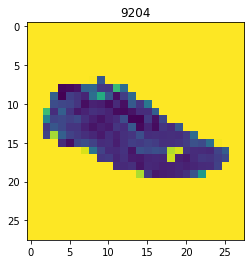

In [42]:
plt.imshow(X_similar[0])
plt.title(X_id_similar[0])

# Calculating Vector Distance between Two Image

In [43]:
import math
def calculateDistance(i1, i2):
    return math.sqrt(np.sum((i1-i2)**2))

In [44]:
print(calculateDistance(numpy_image,X_numpy[0]))

8.253265172365573


In [45]:
distance_list=[]
for i in range (0, len(X_numpy)):
    distance_list.append(calculateDistance(numpy_image,X_numpy[i]))

sorted_distance_list=distance_list.copy()
#print(distance_list)
sorted_distance_list.sort()

least_ten_distance=sorted_distance_list[0:10]
print(least_ten_distance)
index_distance=[]
for i in range (0, len(least_ten_distance)-1):
    if(least_ten_distance[i]!=least_ten_distance[i+1]):
        index_distance.append(distance_list.index(least_ten_distance[i]))

index_distance=index_distance[0:5]

print(index_distance)

[2.290004692513522, 2.3650115238369525, 2.6407826831351207, 2.7060102271574973, 2.726029005846253, 2.773111959934159, 2.807629524134277, 2.815522415899563, 2.818554986280771, 2.8743867507032212]
[64, 529, 93, 204, 505]


# Recommended Items

9204
39988
22198
29570
26538


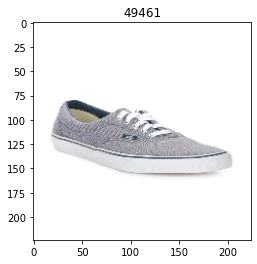

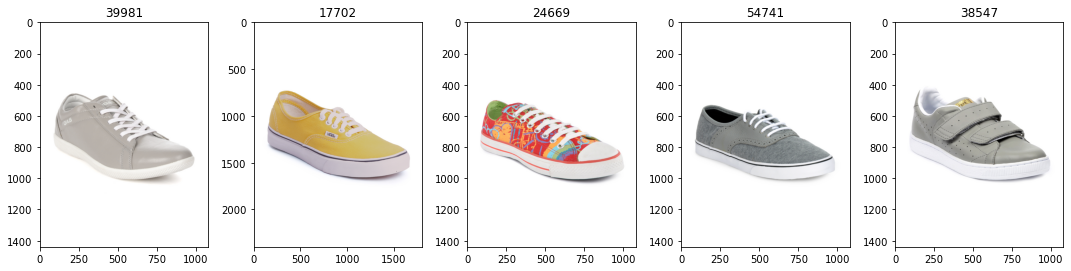

In [46]:
# Image_path=DATASET_PATH+list_directory[index]+"/"+str(img_id)+".jpg"
# src = cv2.imread(Image_path)
# image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
plt.imshow(img)
plt.title(img_id)

fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
axis=[]
for i in range(0,len(index_distance)):
    print(X_id_similar[i])
    Image_path=DATASET_PATH+list_directory[index]+"/"+str(X_id_similar[index_distance[i]])+".jpg"
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
    axis.append(fig.add_subplot(1,5, i+1))
    subplot_title=str(X_id_similar[index_distance[i]])
    axis[-1].set_title(subplot_title)  
    plt.imshow(image)

fig.tight_layout()
plt.show()
    